O dataframe contém informações sobre os clientes de um shopping, incluindo seus IDs, gênero, idade, renda anual e pontuação de gastos.

- CustomerID: Um identificador único para cada cliente.
- Gender: O gênero do cliente (masculino ou feminino).
- Age: A idade do cliente.
- Annual Income (k$): A renda anual do cliente em milhares de dólares.
- Spending Score (1-100): Uma pontuação atribuída ao cliente com base em seu comportamento de compra, variando de 1 a 100.

O conjunto de dados possui 200 linhas, o que indica informações sobre 200 clientes. Todas as colunas contêm valores não nulos, garantindo a integridade dos dados para análise posterior.

Fonte: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Carregar o dataset de clientes
df = pd.read_csv('Mall_Customers.csv')

# Visualizar as primeiras linhas do dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Verificar informações sobre o conjunto de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [5]:
# Verificar a existência de valores nulos
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
# Selecionar as variáveis para análise de agrupamento
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

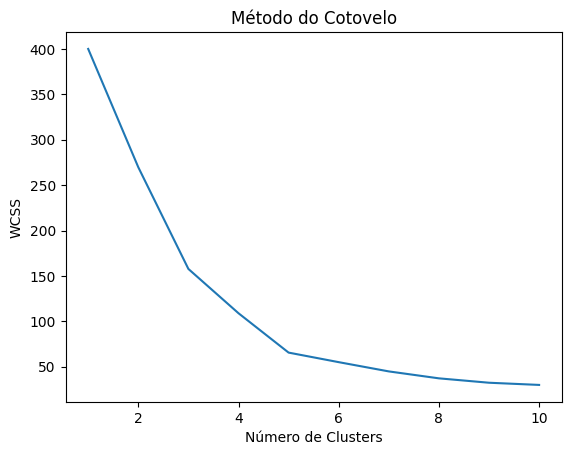

In [7]:
# Método do cotovelo para encontrar o número ideal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# Aplicar o algoritmo KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Aplicar o algoritmo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [22]:
# Avaliar o KMeans
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)

print(f"KMeans - Silhouette Score: {silhouette_kmeans}")
print(f"KMeans - Davies-Bouldin Score: {davies_bouldin_kmeans}")
print(f"KMeans - Calinski-Harabasz Score: {calinski_harabasz_kmeans}")

KMeans - Silhouette Score: 0.5546571631111091
KMeans - Davies-Bouldin Score: 0.5722356162263352
KMeans - Calinski-Harabasz Score: 248.64932001536357


In [23]:
# Avaliar o DBSCAN
if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)
    calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled, dbscan_labels)

    print(f"DBSCAN - Silhouette Score: {silhouette_dbscan}")
    print(f"DBSCAN - Davies-Bouldin Score: {davies_bouldin_dbscan}")
    print(f"DBSCAN - Calinski-Harabasz Score: {calinski_harabasz_dbscan}")
else:
    print("DBSCAN não identificou clusters suficientes para calcular as métricas.")

DBSCAN - Silhouette Score: 0.35044619989666004
DBSCAN - Davies-Bouldin Score: 0.8285103931757107
DBSCAN - Calinski-Harabasz Score: 60.838816010569076


In [24]:
# Adicionar os clusters ao dataframe original
df['Cluster_KMeans'] = kmeans_labels
df['Cluster_DBSCAN'] = dbscan_labels

# Analisar a distribuição de gênero em cada cluster
cluster_gender = df.groupby(['Cluster_KMeans', 'Gender']).size().unstack()
print(cluster_gender)

Gender          Female  Male
Cluster_KMeans              
0                   48    33
1                   21    18
2                   13     9
3                   16    19
4                   14     9


In [25]:
# Descrição dos clusters 0 e 1
group_0 = df[df['Cluster_KMeans'] == 0]
group_1 = df[df['Cluster_KMeans'] == 1]

print("\nDescrição do Cluster 0 (KMeans):")
print(group_0.describe())

print("\nDescrição do Cluster 1 (KMeans):")
print(group_1.describe())


Descrição do Cluster 0 (KMeans):
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster_KMeans  Cluster_DBSCAN  
count            81.0            81.0  
mean              0.0             0.0  
std               0.0             0.0  
min               0.0             0.0  
25%               0.0             0.0  
50%               0.0             0.0  
7

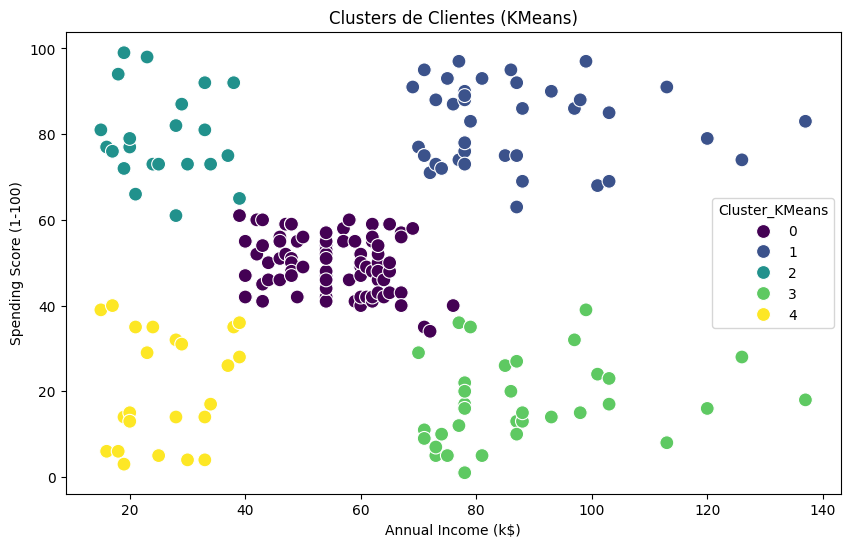

In [26]:
# Visualização dos clusters do KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', data=df, palette='viridis', s=100)
plt.title('Clusters de Clientes (KMeans)')
plt.show()

Os clusters K-Means apresentam uma separação visualmente mais clara e distinta entre os grupos. Há um cluster de alta renda e alto gasto bem definido, e outro de baixa renda e baixo gasto.

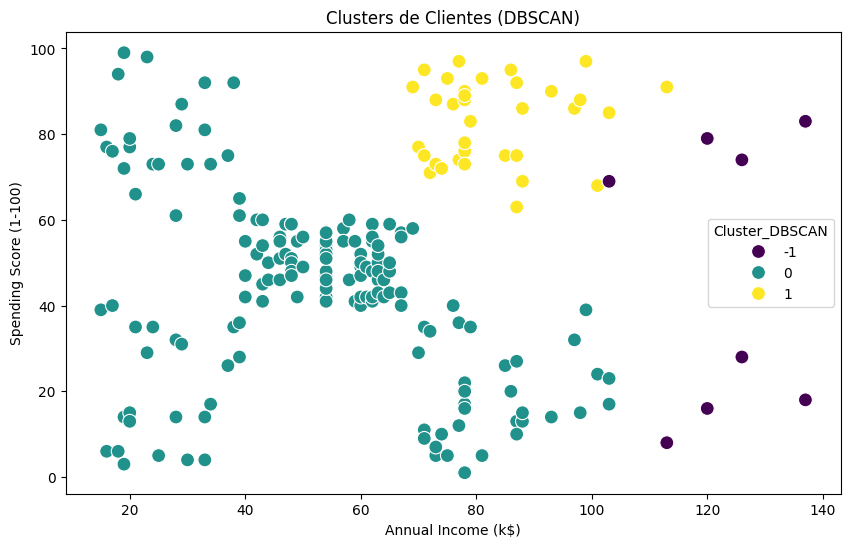

In [27]:
# Visualização dos clusters do DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_DBSCAN', data=df, palette='viridis', s=100)
plt.title('Clusters de Clientes (DBSCAN)')
plt.show()

O DBSCAN forma clusters com base na densidade dos pontos, o que pode levar a formatos menos definidos e à identificação de outliers (pontos rotulados como -1).
Na Imagem, há três clusters principais e alguns outliers.

In [28]:
##incluindo novas variaveis no modelo
# Convertendo a coluna Gender para numérica
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [29]:
# Selecionando colunas para a clusterização
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [30]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Aplicando o método do cotovelo para o KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


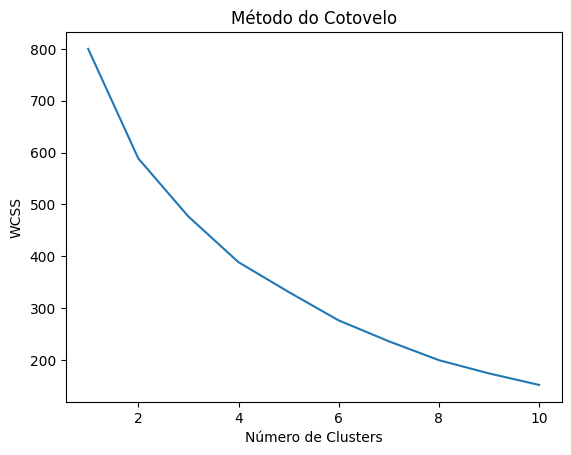

In [32]:
# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
# Baseado no gráfico do cotovelo, podemos selecionar o número ideal de clusters
n_clusters = 5  # Exemplo, ajuste com base no gráfico

# Aplicando KMeans
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [34]:
# Aplicando DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [35]:
# Validando os clusters
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)

print(f"KMeans - Silhouette Score: {silhouette_kmeans}")
print(f"KMeans - Davies-Bouldin Score: {davies_bouldin_kmeans}")
print(f"KMeans - Calinski-Harabasz Score: {calinski_harabasz_kmeans}")

KMeans - Silhouette Score: 0.3040600988258827
KMeans - Davies-Bouldin Score: 1.1672300848200368
KMeans - Calinski-Harabasz Score: 68.96456847863874


In [36]:
# Agrupando resultados no dataframe original para descrição dos grupos
df['Cluster_KMeans'] = kmeans_labels
df['Cluster_DBSCAN'] = dbscan_labels

In [37]:
# Descrição de dois grupos do KMeans
group_0 = df[df['Cluster_KMeans'] == 0]
group_1 = df[df['Cluster_KMeans'] == 1]

print("\nDescrição do Cluster 0 (KMeans):")
print(group_0.describe())

print("\nDescrição do Cluster 1 (KMeans):")
print(group_1.describe())


Descrição do Cluster 0 (KMeans):
       CustomerID     Gender        Age  Annual Income (k$)  \
count   39.000000  39.000000  39.000000           39.000000   
mean   162.000000   0.538462  32.692308           86.538462   
std     22.803509   0.505035   3.728650           16.312485   
min    124.000000   0.000000  27.000000           69.000000   
25%    143.000000   0.000000  30.000000           75.500000   
50%    162.000000   1.000000  32.000000           79.000000   
75%    181.000000   1.000000  35.500000           95.000000   
max    200.000000   1.000000  40.000000          137.000000   

       Spending Score (1-100)  Cluster_KMeans  Cluster_DBSCAN  
count               39.000000            39.0       39.000000  
mean                82.128205             0.0        3.871795  
std                  9.364489             0.0        4.130627  
min                 63.000000             0.0       -1.000000  
25%                 74.500000             0.0       -1.000000  
50%           

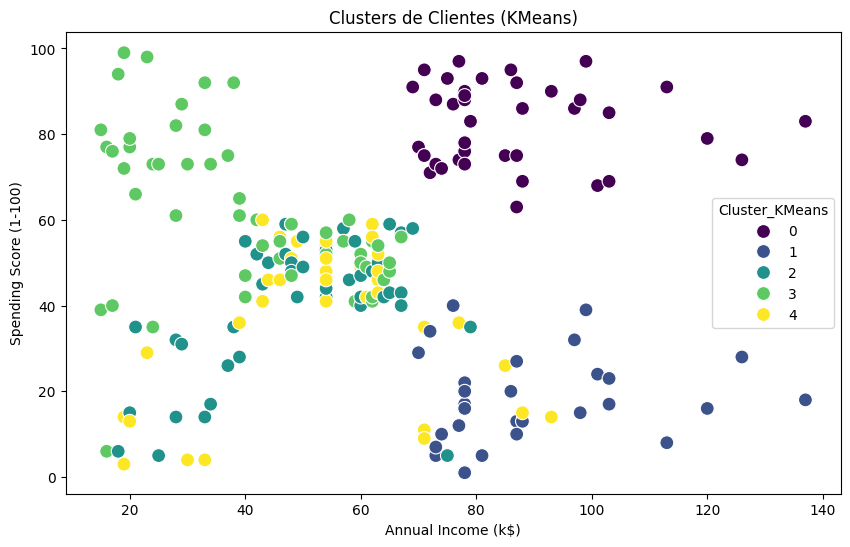

In [38]:
# Visualização dos clusters formados pelo KMeans
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', data=df, palette='viridis', s=100)
plt.title('Clusters de Clientes (KMeans)')
plt.show()


A separação continua evidente, mas a distribuição dos clusters se altera, indicando a influência das novas variáveis.

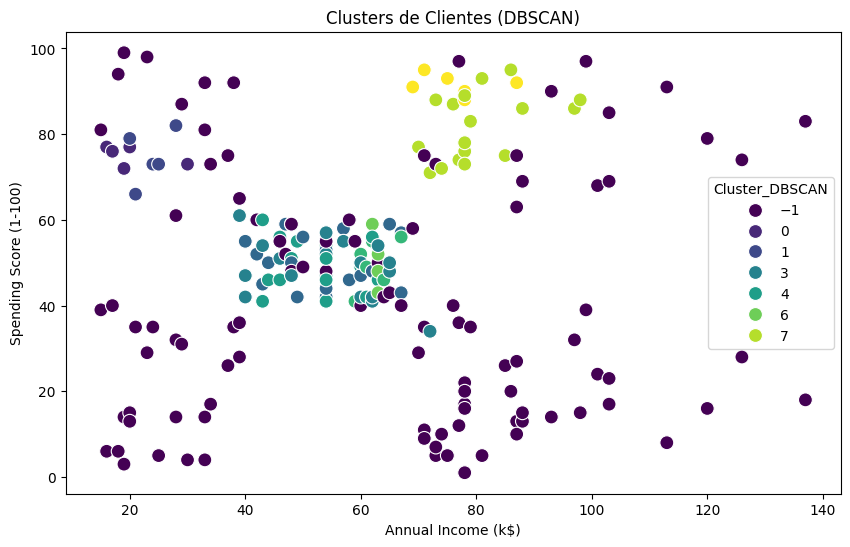

In [39]:
# Visualização dos clusters formados pelo DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_DBSCAN', data=df, palette='viridis', s=100)
plt.title('Clusters de Clientes (DBSCAN)')
plt.show()

Na Imagem, com a inclusão de 'Gênero' e 'Idade', o DBSCAN identificou um número maior de clusters e outliers, o que pode indicar uma maior complexidade na estrutura dos dados com as novas variáveis.

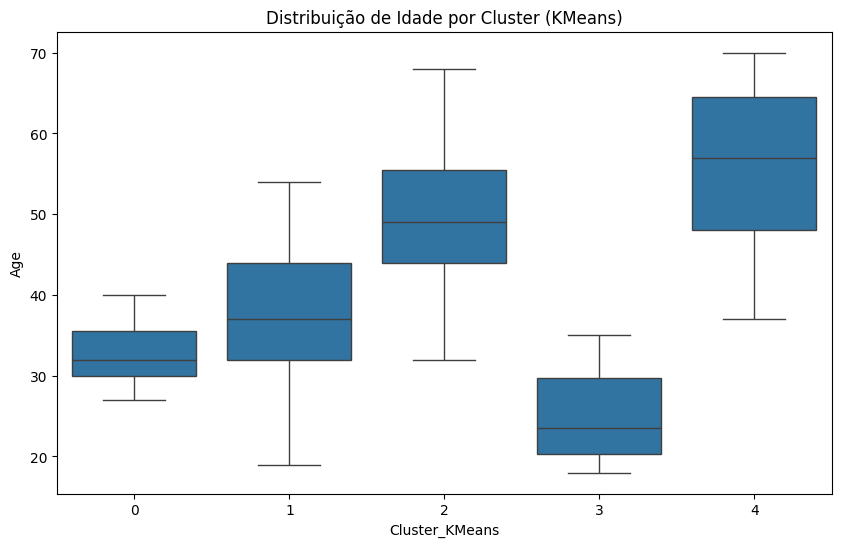

In [40]:
# Analisando a relação de gênero e idade com os clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_KMeans', y='Age', data=df)
plt.title('Distribuição de Idade por Cluster (KMeans)')
plt.show()

O boxplot mostra que a idade varia entre os clusters K-Means, sugerindo que a idade pode ser um fator relevante na segmentação dos clientes.

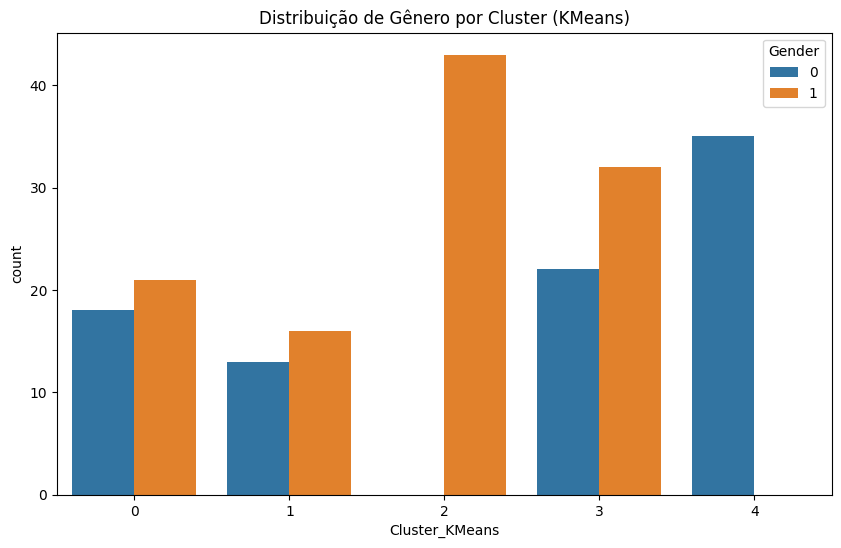

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster_KMeans', hue='Gender', data=df)
plt.title('Distribuição de Gênero por Cluster (KMeans)')
plt.show()

O gráfico de barras indica um desequilíbrio de gênero em alguns clusters K-Means, o que pode ser útil para estratégias de marketing direcionadas.

# Conclusão

## Qual Modelo Teve Melhor Performance?

Considerando as métricas de avaliação e a interpretabilidade dos resultados:

- Sem 'Gênero' e 'Idade': O K-Means apresentou melhor desempenho, com uma pontuação de silhueta mais alta (0.555 vs. 0.350) e uma pontuação Davies-Bouldin mais baixa (0.572 vs. 0.829), indicando clusters mais compactos e bem separados.
- Com 'Gênero' e 'Idade': A inclusão de novas variáveis diminuiu a qualidade dos clusters em ambos os modelos. O K-Means ainda apresenta uma pontuação de silhueta ligeiramente melhor (0.304 vs. nenhuma pontuação para o DBSCAN, possivelmente devido a muitos clusters pequenos ou outliers), mas a pontuação Davies-Bouldin é pior (1.167 vs. nenhuma pontuação para o DBSCAN).

- Em geral, o K-Means parece ter um desempenho ligeiramente superior ao DBSCAN neste caso, especialmente quando consideramos apenas 'Renda Anual' e 'Pontuação de Gastos'.
Os clusters K-Means são mais distintos e fáceis de interpretar, enquanto o DBSCAN pode ser útil para identificar outliers e padrões de densidade nos dados.
A escolha do melhor modelo depende dos objetivos da análise. Se a clareza na definição dos clusters e a facilidade de interpretação são prioritárias, o K-Means pode ser mais adequado. Se a identificação de outliers e a análise de densidade são importantes, o DBSCAN pode ser mais útil.